Name: Niemo, Christian Al C.<br>
Course and Section: CPE019-CPE32S9<br>
Date of Submission: 2/7/2024<br>
Instructor: Engr. Roman Richard<br>



Objectives:<br>
Part 1: The Dataset<br>
Part 2: Scatterplot Graphs and Correlatable Variables<br>
Part 3: Calculating Correlation with Python<br>
Part 4: Visualizing <br>


**Part 1: The Dataset**

Step 1: Loading the Dataset From a File

Before the dataset can be used, it must be loaded onto memory.<br>
In the code below, The first line imports the pandas modules and defines pd as a descriptor that refers to
the module.<br>
The second line loads the dataset CSV file into a variable called brainFile.<br>
The third line uses read_csv(), a pandas method, to convert the CSV dataset stored in brainFile into a dataframe. The dataframe is then stored in the brainFrame variable.<br>
Run the cell below to execute the described functions.<br>

In [36]:
# Code cell 1
import pandas as pd
brainFile = '/content/brainsize.txt'
brainFrame = pd.read_csv(brainFile, sep="\t")

Step 2: Verifying the dataframe.

To make sure the dataframe has been correctly loaded and created, use the head() method. Another
Pandas method, head() displays the first five entries of a dataframe.

In [13]:
# Code cell 2

brainFrame.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


**Part 2: Scatterplot Graphs and Correlatable Variables**

*Step 1: The pandas describe() method.*

The pandas module includes the describe() method which performs same common calculations against a given dataset. In addition to provide common results including count, mean, standard deviation, minimum, and maximum, describe() is also a great way to quickly test the validity of the values in the dataframe.

Run the cell below to output the results computed by describe() against the brainFrame dataframe.

In [40]:
# Code cell 3
brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


*Step 2: Scatterplot graphs*

Scatterplot graphs are important when working with correlations as they allow for a quick visual verification of the nature of the relationship between the variables. This lab uses the Pearson correlation
coefficient, which is sensitive only to a linear relationship between two variables. Other more robust correlation methods exist but are out of the scope of this lab.

a. Load the required modules.
Before graphs can be plotted, it is necessary to import a few modules, namely numpy and matplotlib.

Run the cell below to load these modules.

In [18]:
# Code cell 4
import numpy as np
import matplotlib.pyplot as plt

*b. Separate the data.*

To ensure the results do not get skewed because of the differences in male and female bodies, the dateframe is split into two dataframes: one containing all male entries and another with only female
instances.

Running the cell below creates the two new dataframes, menDf and womenDf, each one containing the respective entries.

In [41]:
# Code cell 5
menDf = brainFrame[(brainFrame.Gender == 'Male')]
womenDf = brainFrame[(brainFrame.Gender == 'Female')]

c. Plot the graphs.

Because the dataset includes three different measures of intelligence (PIQ, FSIQ, and VIQ), the first line below uses Pandas mean() method to calculate the mean value between the three and store the result in the menMeanSmarts variable. Notice that the first line also refers to the menDf, the filtered dataframe containing only male entries.

The second line uses the matplotlib method scatter() to create a scatterplot graph between the menMeanSmarts variable and the MRI_Countattribute. The MRI_Count in this dataset can be thought as of a measure of the physical size of the subjects' brains.

The third line simply displays the graph.

The fourth line is used to ensure the graph will be displayed in this notebook.

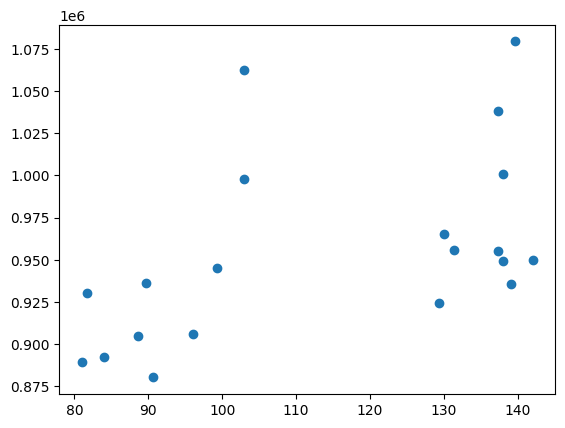

In [20]:
# Code cell 6
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show()
%matplotlib inline

Similarly, the code below creates a scatterplot graph for the women-only filtered dataframe.

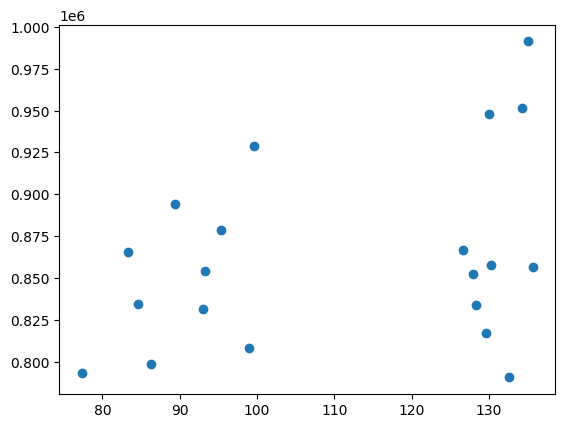

In [23]:
# Code cell 7
# Graph the women-only filtered dataframe
womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])

plt.show()
%matplotlib inline

**Part 3: Calculating Correlation with Python**

Step 1: Calculate correlation against brainFrame.

The pandas corr() method provides an easy way to calculate correlation against a dataframe. By simply calling the method against a dataframe, one can get the correlation between all variables at the same time.

In [27]:
# Code cell 8
brainFrame.corr(method='pearson')

<ipython-input-27-cab48f3abe05>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  brainFrame.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


Notice at the left-to-right diagonal in the correlation table generated above. Why is the diagonal filled with 1s? Is that a coincidence? Explain.
- The diagonal represents the correlation of each variable with itself. Since each variable is perfectly correlated with itself, the correlation coefficient is 1. The correlation coefficient between a variable and itself is called the auto-correlation or auto-covariance. It's always 1 for any variable correlated with itself, irrespective of the nature of the data or the variables involved.

Still looking at the correlation table above, notice that the values are mirrored; values below the 1 diagonal have a mirrored counterpart above the 1 diagonal. Is that a coincidence? Explain.

*   Tt's a direct consequence of the definition of correlation coefficients.



Using the same corr() method, it is easy to calculate the correlation of the variables contained in the female-only dataframe

In [42]:
# Code cell 9
womenDf.corr(method='pearson')

<ipython-input-42-a6271751808a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  womenDf.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


And the same can be done for the male-only dataframe:

In [29]:
# Code cell 10
# Use corr() for the male-only dataframe with the pearson method
menDf.corr(method='pearson')

<ipython-input-29-cc2854916971>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  menDf.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


**Part 4: Visualizing**

*Step 1: Install Seaborn.*

To make it easier to visualize the data correlations, heatmap graphs can be used. Based on colored squares, heatmap graphs can help identify correlations in a glance.

The Python module named seaborn makes it very easy to plot heatmap graphs.

First, run the cell below to download and install the seaborn module.

In [30]:
# Code cell 11
!pip install seaborn

Step 2: Plot the correlation heatmap.

Now that the dataframes are ready, the heatmaps can be plotted. Below is a breakdown of the code in the cell below:

Line 1: Generates a correlation table based on the womenNoGenderDf dataframe and stores it on wcorr.

Line 2: Uses the seaborn heatmap() method to generate and plot the heatmap. Notice that heatmap() takes wcorr as a parameter.

Line 3: Use to export and save the generated heatmap as a PNG image. While the line 3 is not active (it has the comment # character preceding it, forcing the interpreter to ignore it), it was kept for informational purposes.

<ipython-input-34-2465c40f5efb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wcorr = womenDf.corr()


<Axes: >

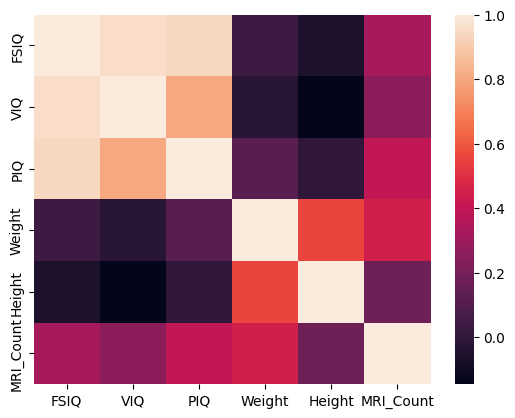

In [34]:
# Code cell 12
import seaborn as sns
wcorr = womenDf.corr()
sns.heatmap(wcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

Similarly, the code below creates and plots a heatmap for the male-only dataframe.

<ipython-input-43-2274d85d8dd8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mcorr = menDf.corr()


<Axes: >

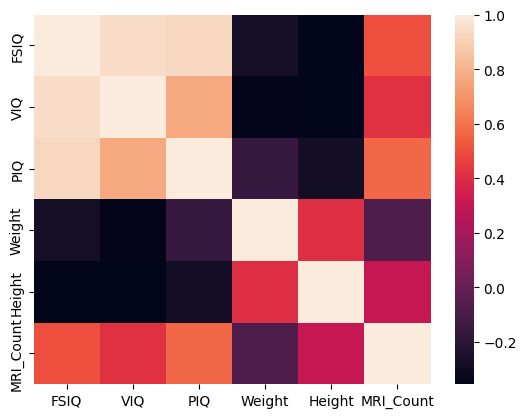

In [43]:
# Code cell 13
import seaborn as sns
mcorr = menDf.corr()
sns.heatmap(mcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

Many variable pairs present correlation close to zero. What does that mean?

*   When two variables have a correlation close to zero, it typically means that there is little to no linear relationship between them. In statistical terms, correlation measures the strength and direction of the relationship between two variables.

Why separate the genders?

*   Separating data by gender allows us to understand how different factors affect boys and girls differently.

What variables have stronger correlation with brain size (MRI_Count)? Is that expected? Explain.

*   FSIQ, VIQ, and PIQ all have relatively strong positive correlations with each other, with correlation coefficients ranging from approximately 0.78 to 0.95.


**SUPPLEMENTARY**

In [37]:
import pandas as pd
studentsFile = '/content/student-mat.csv'
studentsFrame = pd.read_csv(studentsFile, sep=";")

In [39]:
studentsFrame.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [46]:
# Code cell 3
studentsFrame.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [62]:
maleDf = studentsFrame[(studentsFrame.sex == "M")]
femaleDf = studentsFrame[(studentsFrame.sex == "F")]

In [65]:
studentsFrame.corr(method='pearson')

<ipython-input-65-a45735cabbfd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  studentsFrame.corr(method='pearson')


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [67]:
maleDf.corr(method='pearson')

<ipython-input-67-abb0758bf82a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  maleDf.corr(method='pearson')


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.224344,-0.229856,0.028985,-0.152251,0.375306,0.030901,0.036182,0.176930,0.245704,0.247321,-0.053293,0.244087,-0.225840,-0.274882,-0.272040
Medu,-0.224344,1.000000,0.623741,-0.190398,0.156735,-0.303348,-0.016323,0.012675,0.021246,-0.031790,-0.124455,-0.054774,0.158767,0.210116,0.228952,0.203732
Fedu,-0.229856,0.623741,1.000000,-0.169010,0.083773,-0.355873,0.005504,-0.109012,0.027105,-0.054620,-0.085868,-0.041558,0.052762,0.237263,0.189305,0.160523
traveltime,0.028985,-0.190398,-0.169010,1.000000,-0.056282,0.164113,-0.087760,0.001644,0.106013,0.130113,0.166758,-0.060550,0.048776,-0.188267,-0.199833,-0.191460
studytime,-0.152251,0.156735,0.083773,-0.056282,1.000000,-0.251064,-0.007403,-0.050350,-0.036861,-0.115593,-0.168001,-0.115571,-0.074083,0.190295,0.198154,0.176335
failures,0.375306,-0.303348,-0.355873,0.164113,-0.251064,1.000000,0.030384,0.247977,0.278513,0.148218,0.198477,0.021507,0.060493,-0.476230,-0.465862,-0.478148
famrel,0.030901,-0.016323,0.005504,-0.087760,-0.007403,0.030384,1.000000,0.173285,-0.026370,-0.155329,-0.194270,0.164898,-0.067068,0.015881,-0.046433,0.046613
freetime,0.036182,0.012675,-0.109012,0.001644,-0.050350,0.247977,0.173285,1.000000,0.203239,0.145842,0.002490,0.085530,0.028586,0.011189,-0.038583,-0.024129
goout,0.176930,0.021246,0.027105,0.106013,-0.036861,0.278513,-0.026370,0.203239,1.000000,0.333063,0.539459,0.037746,0.228589,-0.228247,-0.248277,-0.234775
Dalc,0.245704,-0.031790,-0.054620,0.130113,-0.115593,0.148218,-0.155329,0.145842,0.333063,1.000000,0.675284,0.041666,0.198429,-0.194556,-0.143289,-0.145485


In [68]:
femaleDf.corr(method='pearson')

<ipython-input-68-f4037257a9cd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  femaleDf.corr(method='pearson')


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.098386,-0.095179,0.123829,0.130029,0.097176,0.081230,0.010824,0.079739,-0.031917,-0.028273,-0.064362,0.140070,0.112836,0.001995,-0.049473
Medu,-0.098386,1.000000,0.622388,-0.164029,0.035054,-0.178157,-0.001482,0.012568,0.093851,0.049138,-0.008369,-0.062532,0.080029,0.189630,0.191620,0.217194
Fedu,-0.095179,0.622388,1.000000,-0.152916,-0.073665,-0.149004,-0.011480,0.061248,0.053221,0.068906,0.051941,0.053821,0.013207,0.141709,0.137109,0.140366
traveltime,0.123829,-0.164029,-0.152916,1.000000,-0.120025,0.002718,0.050109,-0.069990,-0.064907,0.129877,0.061526,0.058167,-0.047843,-0.001658,-0.115278,-0.056889
studytime,0.130029,0.035054,-0.073665,-0.120025,1.000000,-0.083173,0.123652,-0.100665,-0.048549,-0.151296,-0.210890,0.038165,-0.099160,0.207633,0.148091,0.101552
failures,0.097176,-0.178157,-0.149004,0.002718,-0.083173,1.000000,-0.125721,-0.092057,-0.043070,0.103378,0.050395,0.097717,0.075343,-0.238695,-0.250549,-0.260475
famrel,0.081230,-0.001482,-0.011480,0.050109,0.123652,-0.125721,1.000000,0.110040,0.141890,-0.012635,-0.066263,0.019327,-0.027006,0.017781,-0.002124,0.044696
freetime,0.010824,0.012568,0.061248,-0.069990,-0.100665,-0.092057,0.110040,1.000000,0.347690,0.184811,0.199468,0.004620,-0.089203,-0.030500,-0.034865,-0.004360
goout,0.079739,0.093851,0.053221,-0.064907,-0.048549,-0.043070,0.141890,0.347690,1.000000,0.152299,0.269888,-0.073032,-0.054111,-0.087386,-0.092920,-0.057349
Dalc,-0.031917,0.049138,0.068906,0.129877,-0.151296,0.103378,-0.012635,0.184811,0.152299,1.000000,0.516895,0.043969,0.108605,-0.014723,-0.012554,-0.002133


<ipython-input-70-5a97dfab8583>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fcorr = femaleDf.corr()


<Axes: >

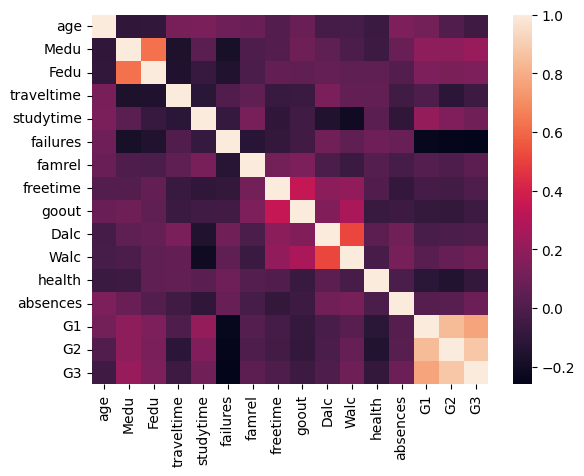

In [70]:
import seaborn as sns
fcorr = femaleDf.corr()
sns.heatmap(fcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

<ipython-input-71-809716363847>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mcorr = maleDf.corr()


<Axes: >

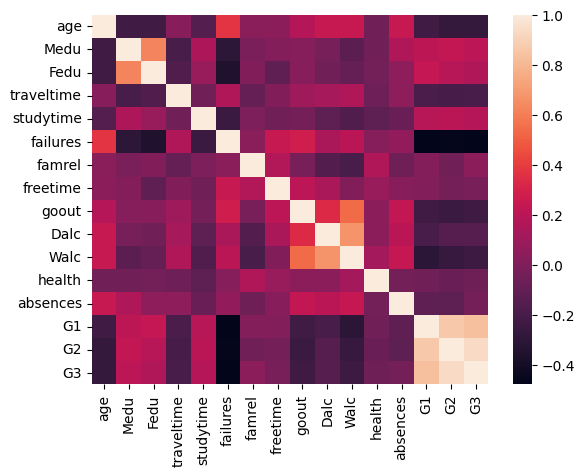

In [71]:
import seaborn as sns
mcorr = maleDf.corr()
sns.heatmap(mcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

**Explanation:**

The supplementary activity is composed of secondary student's performance in Math subject of Portuguese School System. This examination delves into various facets of students' achievements and potential factors that may influence their performance in this academic domain.

**Conclusion**
After completing this activity, I appreciated the implementation of regression and correlation in data analysis. The application of regression analysis allowed for the exploration of relationships between variables and the prediction of one variable based on the values of others. This analytical tool not only facilitated a deeper understanding of the interplay between different factors but also enabled the prediction of one variable based on the values of others, providing invaluable insights for decision-making processes.
